In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
df = pd.read_excel("Weather Records.xlsx")

    Preprocessing

In [5]:
#Filling Type and Severity Columns

# Iterate over all rows of df for Type and Severity when it has nan it sends the index value to the function
# The function will use that index value to get the whole row from main dataframe and get the airportcode 
# and the Date from StartTime which will later be used to get Type and Severity value if present for that day
# Similar Logic has been used to fill in the data for other Columns

non_nan_df = df[df["Type"].isna() == False]
non_nan_df = non_nan_df[non_nan_df["Severity"].isna() == False]

non_nan_start_date = non_nan_df["StartTime(UTC)"].to_list()

def findTypeandSevrity(idx):
    
    st_time = df.iloc[idx]["StartTime(UTC)"]
    foundindex = -1

    for i in range(0,len(non_nan_start_date)):
        if non_nan_start_date[i].date() == st_time.date():
            foundindex = i
            break
    
    if foundindex != -1:
        new_type = df.iloc[foundindex]["Type"]
        new_severity = df.iloc[foundindex]["Severity"]

        return new_type,new_severity
    else:
        return np.NaN,np.NaN  


all_type = df["Type"].to_list()
all_severity = df["Severity"].to_list()

corrected_type = []
corrected_severity = []

for i in range(0,len(all_type)):

    if str(all_type[i]) == 'nan':
        x,y = findTypeandSevrity(i)

        corrected_type.append(x)
        corrected_severity.append(y)
    else:
        corrected_type.append(all_type[i])
        corrected_severity.append(all_severity[i])

df["Type"] = corrected_type
df["Severity"] = corrected_severity


df.replace(["NaN"], np.NaN, inplace = True)
df = df.dropna(subset=['Type','Severity']).reset_index(drop=True)
#Dropped Remaining NaN values in Type and Severity Column as they had no reading for that entire day thus their value could not be predicted

In [6]:
df.replace(["NaT"], np.NaN, inplace = True)
df = df.dropna(subset=['StartTime(UTC)','EndTime(UTC)']).reset_index(drop=True)
#Dropped StartTime(UTC) and EndTime(UTC) as all Columns except Type and Severity contained NaN values thus we can't predict value for this column

df = df.dropna(subset=['Precipitation(in)']).reset_index(drop=True)
#Drops NaN values in Precipitation(in) as can't use neighbouring columns to predict the value

In [7]:
#Filling missing LocationLat and LocationLng values

non_nan_df = df[df['LocationLat'].isna() == False]

def findLocation(idx):
    code = df.iloc[idx]["AirportCode"]
    tempdf = non_nan_df[non_nan_df["AirportCode"] == code]

    return tempdf["LocationLat"].to_list()[0],tempdf["LocationLng"].to_list()[0]

all_lat = df["LocationLat"].to_list()
all_lng = df["LocationLng"].to_list()

corrected_lat = []
corrected_lng = []

for i in range(0,len(all_lat)):
    
    if str(all_lat[i]) == 'nan':
        x,y = findLocation(i)

        corrected_lat.append(x)
        corrected_lng.append(y)
    else:
        corrected_lat.append(all_lat[i])
        corrected_lng.append(all_lng[i])

df['LocationLat'] = corrected_lat
df['LocationLng'] = corrected_lng

In [8]:
#Filling in Missing City and County Details

non_nan_df = df[df['City'].isna() == False]

def findCityandCounty (idx):
    code = df.iloc[idx]["AirportCode"]
    tempdf = non_nan_df[non_nan_df["AirportCode"] == code]

    return tempdf["City"].to_list()[0],tempdf["County"].to_list()[0]

all_cities = df['City'].to_list()
all_county = df['County'].to_list()

corrected_city = []
corrected_county = []

for i in range(0,len(all_cities)):

    if str(all_cities[i]) == 'nan':
        x,y = findCityandCounty(i)

        corrected_city.append(x)
        corrected_county.append(y)
    else:
        corrected_city.append(all_cities[i])
        corrected_county.append(all_county[i])
    
df["City"] = corrected_city
df["County"] = corrected_county

In [9]:
#Filling State Values
non_nan_df = df[df["State"].isna() == False]

def findingState(idx):

    tempdf = df.iloc[idx]
    city = tempdf["City"]

    temp = non_nan_df[non_nan_df["City"] == city]
    lis = temp["State"].to_list()[0]

    return lis

all_state = df["State"].to_list()

corrected_state = []

for i in range(0,len(all_state)):
    
    if str(all_state[i]) == "nan":
        corrected_state.append(findingState(i))
    else:
        corrected_state.append(str(all_state[i]))

df['State'] = corrected_state

In [10]:
#Filling ZipCode Values
non_nan_df = df[df["ZipCode"].isna() == False]

def findingZipCode(idx):

    tempdf = df.iloc[idx]
    city = tempdf["City"]

    temp = non_nan_df[non_nan_df["City"] == city]
    lis = temp["ZipCode"].to_list()[0]

    return lis

all_zip = df["ZipCode"].to_list()

corrected_zip = []

for i in range(0,len(all_zip)):

    if str(all_zip[i]) == "nan":
        corrected_zip.append(findingZipCode(i))
    else:
        corrected_zip.append(str(all_zip[i]))

df['ZipCode'] = corrected_zip

In [11]:
#Creating new Features using StartDate and EndDate
st_time_list = df["StartTime(UTC)"].to_list()
ed_time_list = df["EndTime(UTC)"].to_list()

start_year = []
start_month = []
start_day = []

end_year = []
end_month = []
end_day = []

# start_time = []
# end_time = []

for i in range(0,len(st_time_list)):

    start_year.append(str(st_time_list[i].date().year))
    start_month.append(str(st_time_list[i].date().month))
    start_day.append(str(st_time_list[i].date().day))

    end_year.append(str(ed_time_list[i].date().year))
    end_month.append(str(ed_time_list[i].date().month))
    end_day.append(str(ed_time_list[i].date().day))

    # start_time.append(st_time_list[i].time())
    # end_time.append(ed_time_list[i].time())

df["Start_Day"] = start_day
df["Start_Month"] = start_month
df["Start_Year"] = start_year

df["End_Day"] = end_day
df["End_Month"] = end_month
df["End_Year"] = end_year

# df["StartTime"] = start_time
# df["EndTime"] = end_time

    Analysis

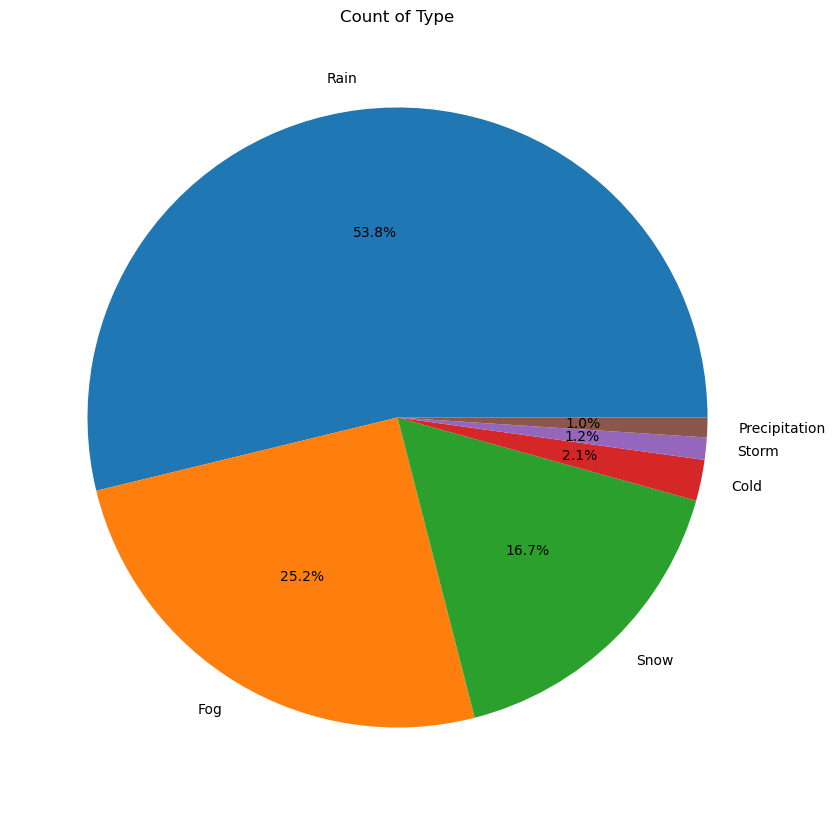

In [205]:
pie = df["Type"].value_counts()

plt.figure(figsize=(10,15))
plt.pie(pie.values,labels=pie.index,autopct='%1.1f%%')
plt.title("Count of Type")
plt.show()

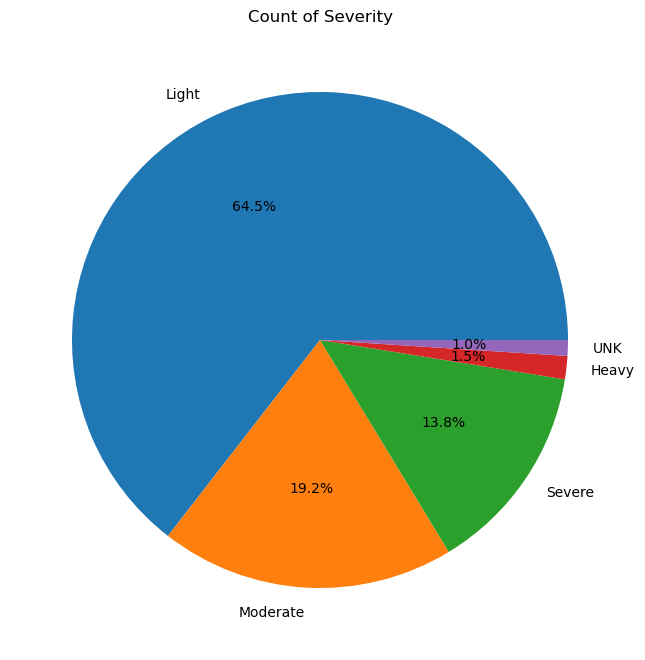

In [206]:
pie = df["Severity"].value_counts()
plt.figure(figsize=(8,15))
plt.pie(pie.values,labels=pie.index,autopct='%1.1f%%')
plt.title("Count of Severity")
plt.show()

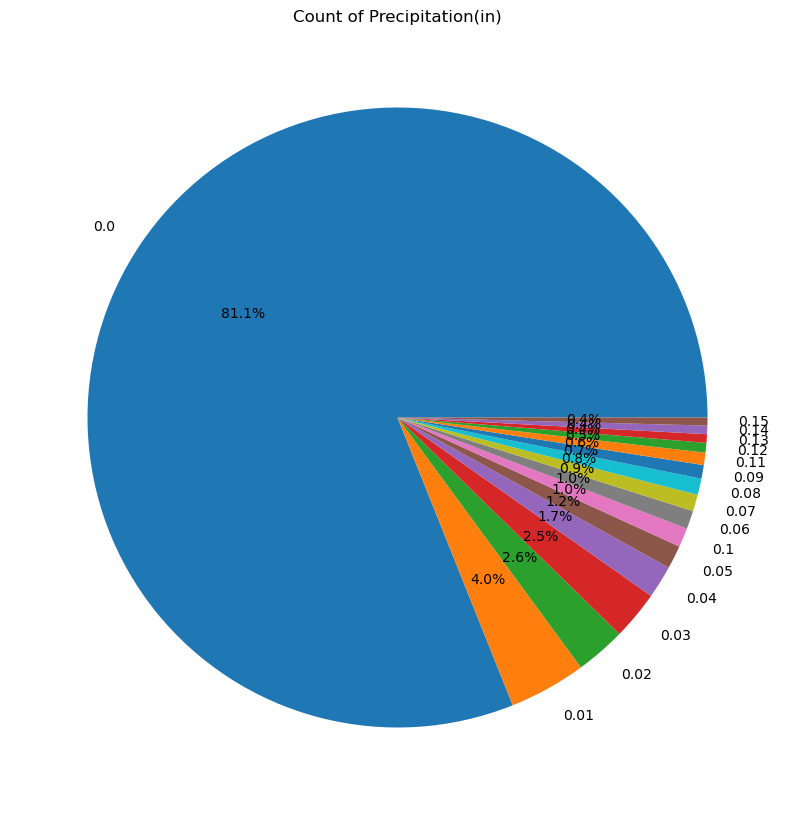

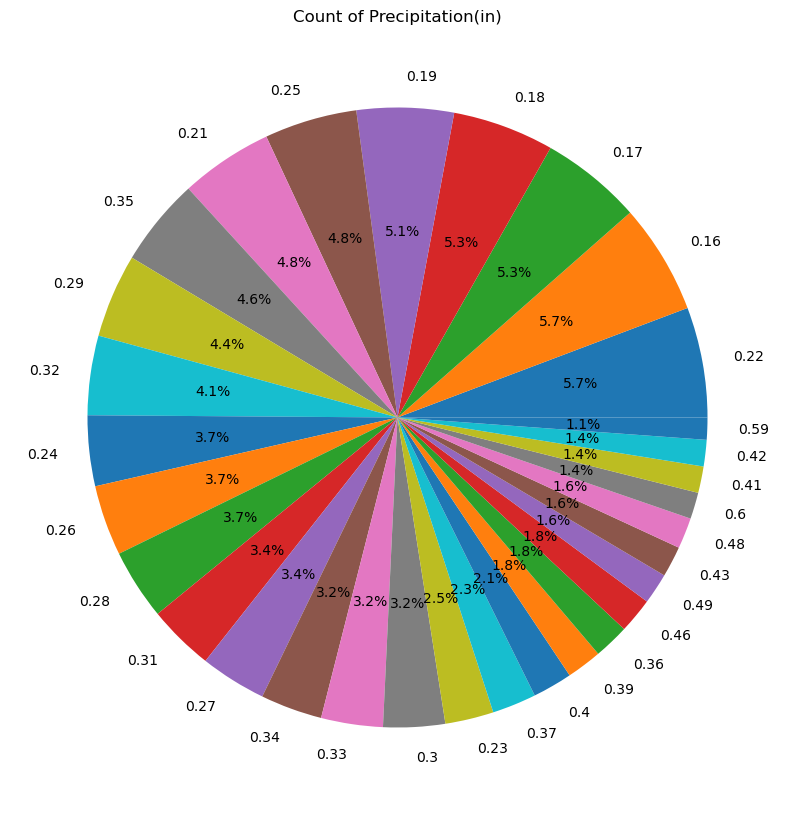

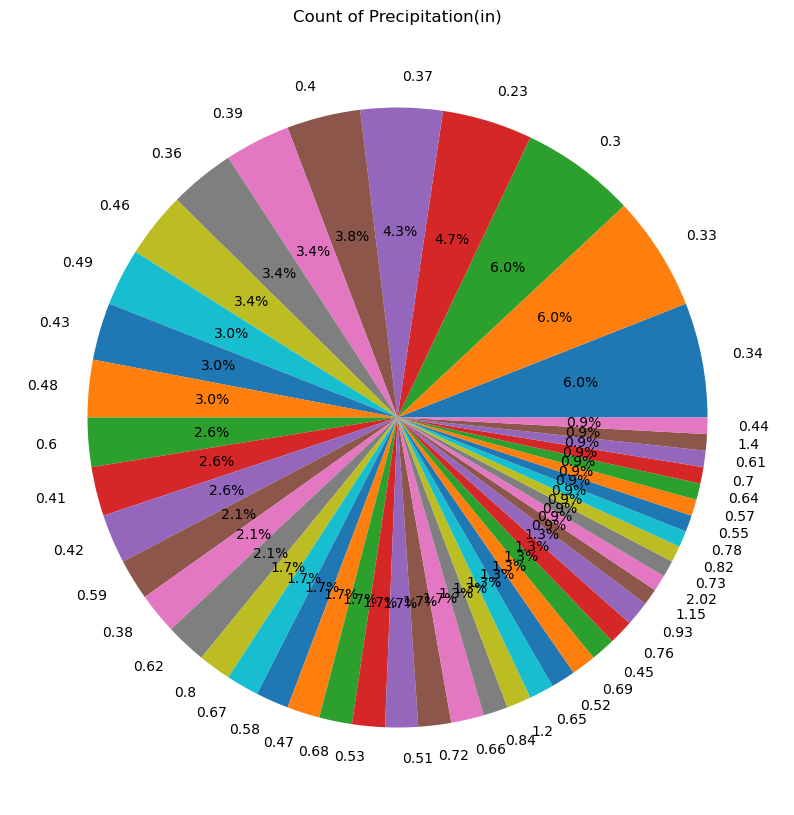

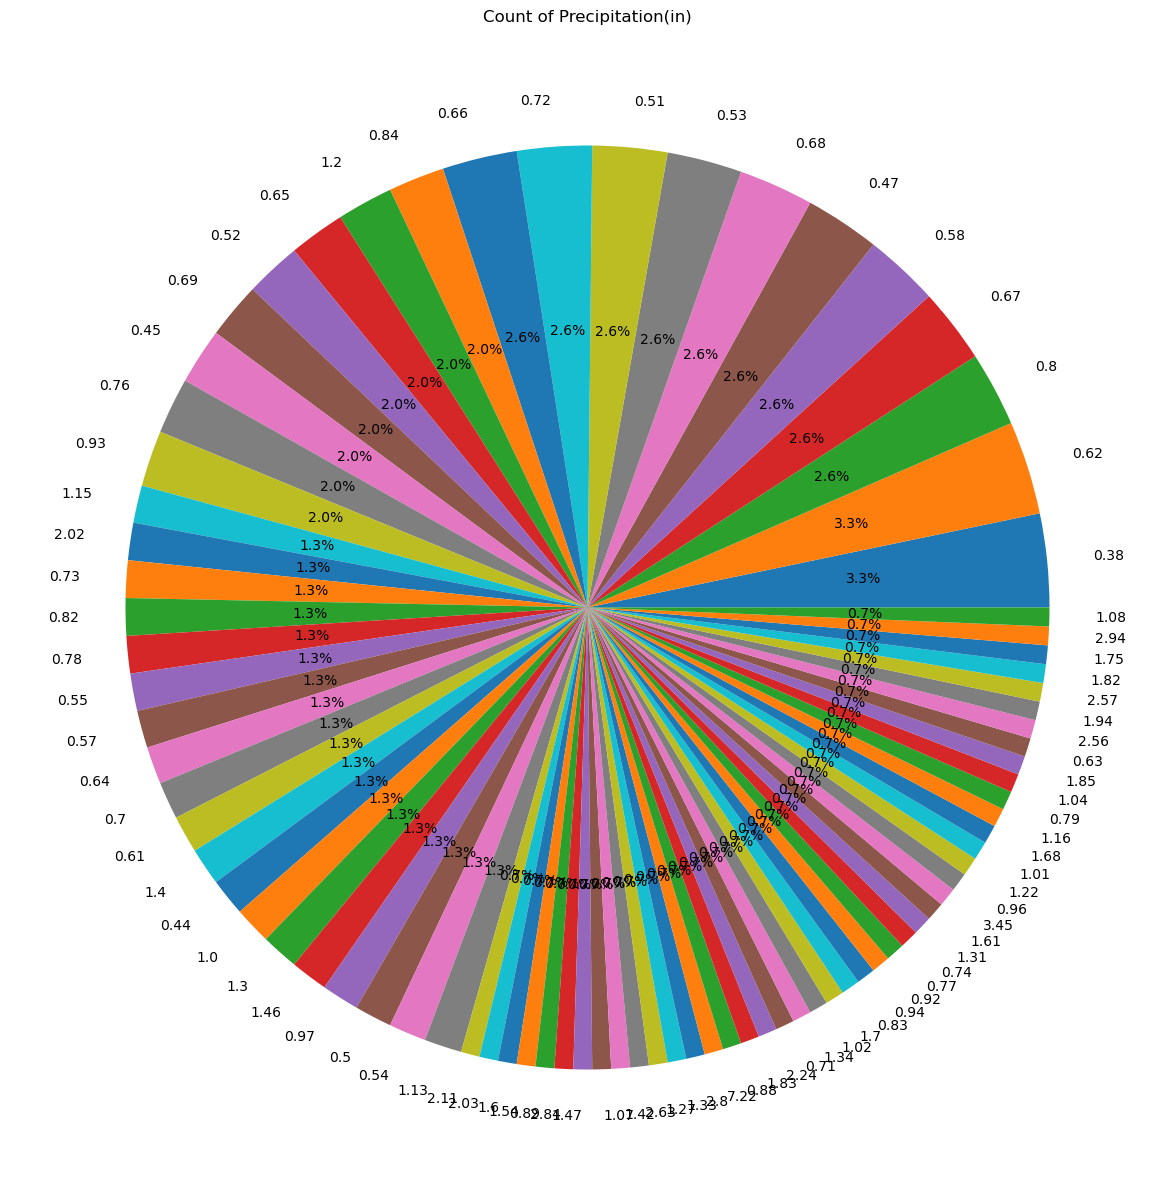

In [207]:
#As there are alot of unique values so pie chart is divided in 4 parts 
pie = df["Precipitation(in)"].value_counts()

part1 = pie.iloc[:int(len(pie)/8)]
part2 = pie.iloc[len(part1)+1:len(part1)+int(len(pie)/4)]
part3 = pie.iloc[len(part2)+1:len(part1)+len(part2)+int(len(pie)/4)]
part4 = pie.iloc[len(part3)+1:]

plt.figure(figsize=(10,15))

plt.pie(part1.values,labels=part1.index,autopct='%1.1f%%')
plt.title("Count of Precipitation(in)")
plt.show()

plt.figure(figsize=(10,15))
plt.pie(part2.values,labels=part2.index,autopct='%1.1f%%')
plt.title("Count of Precipitation(in)")
plt.show()

plt.figure(figsize=(10,15))
plt.pie(part3.values,labels=part3.index,autopct='%1.1f%%')
plt.title("Count of Precipitation(in)")
plt.show()

plt.figure(figsize=(20,15))
plt.pie(part4.values,labels=part4.index,autopct='%1.1f%%')
plt.title("Count of Precipitation(in)")
plt.show()

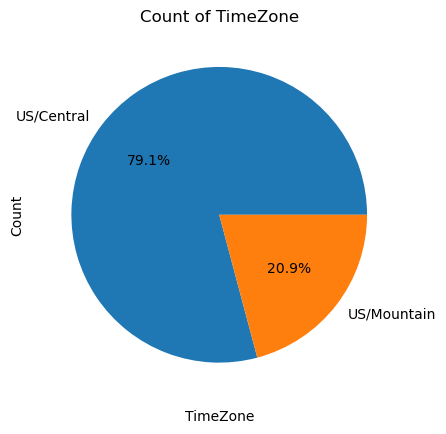

In [208]:
pie = df["TimeZone"].value_counts()

plt.pie(pie.values,labels=pie.index,autopct='%1.1f%%')
plt.title("Count of TimeZone")
plt.xlabel("TimeZone")
plt.ylabel("Count")
plt.show()

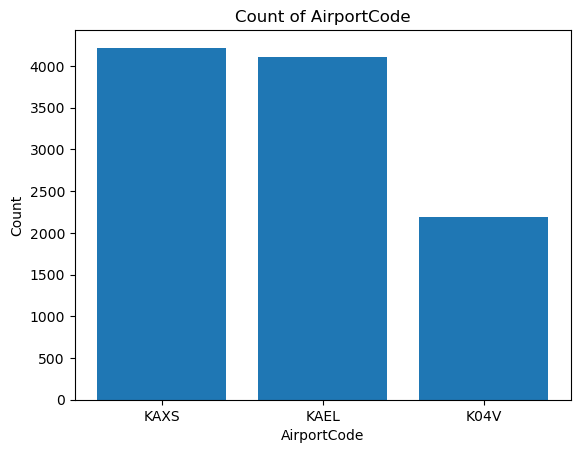

In [209]:
bar = df["AirportCode"].value_counts()

plt.bar(height=bar.values,x=bar.index)
plt.title("Count of AirportCode")
plt.xlabel("AirportCode")
plt.ylabel("Count")
plt.show()

[]

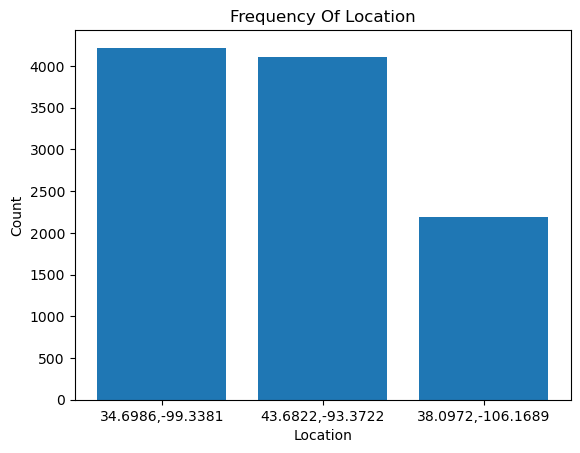

In [210]:
lat = df["LocationLat"].value_counts()
lng = df["LocationLng"].value_counts()

location = []
location_count = []

for i in range(0,len(lat.index)):
    location.append(str(lat.index[i])+","+str(lng.index[i]))
    location_count.append(lat.values[i])

plt.bar(x=location,height=location_count)
plt.title("Frequency Of Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.plot()

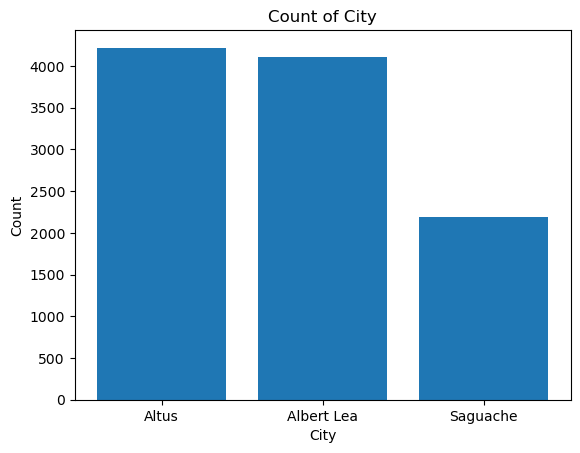

In [211]:
bar = df["City"].value_counts()

plt.bar(height=bar.values,x=bar.index)
plt.title("Count of City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

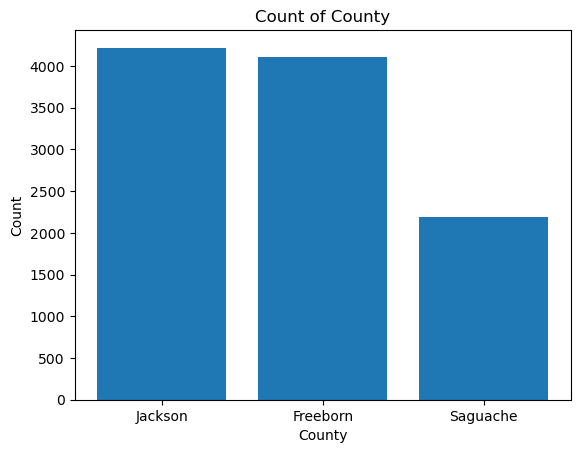

In [212]:
bar = df["County"].value_counts()

plt.bar(height=bar.values,x=bar.index)
plt.title("Count of County")
plt.xlabel("County")
plt.ylabel("Count")
plt.show()

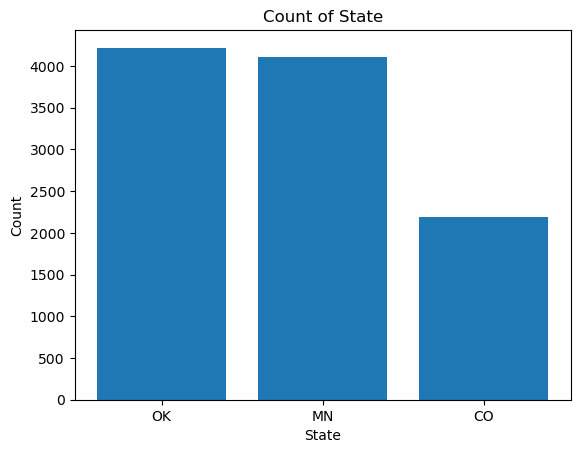

In [213]:
bar = df["State"].value_counts()

plt.bar(height=bar.values,x=bar.index)
plt.title("Count of State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

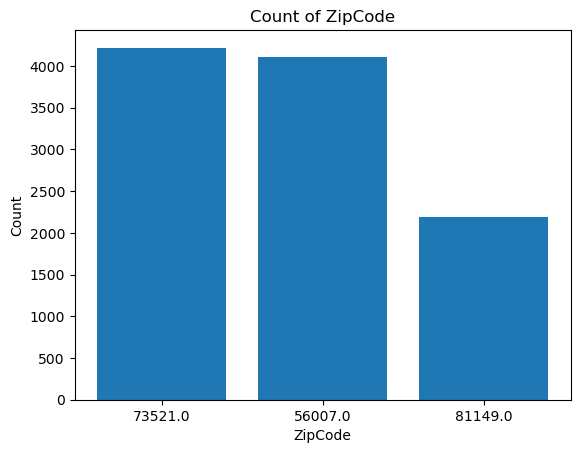

In [214]:
bar = df["ZipCode"].astype("str").value_counts()

ht = []

for i in bar.values:
    ht.append(i)

plt.bar(height=ht,x=bar.index)
plt.title("Count of ZipCode")
plt.xlabel("ZipCode")
plt.ylabel("Count")
plt.show()


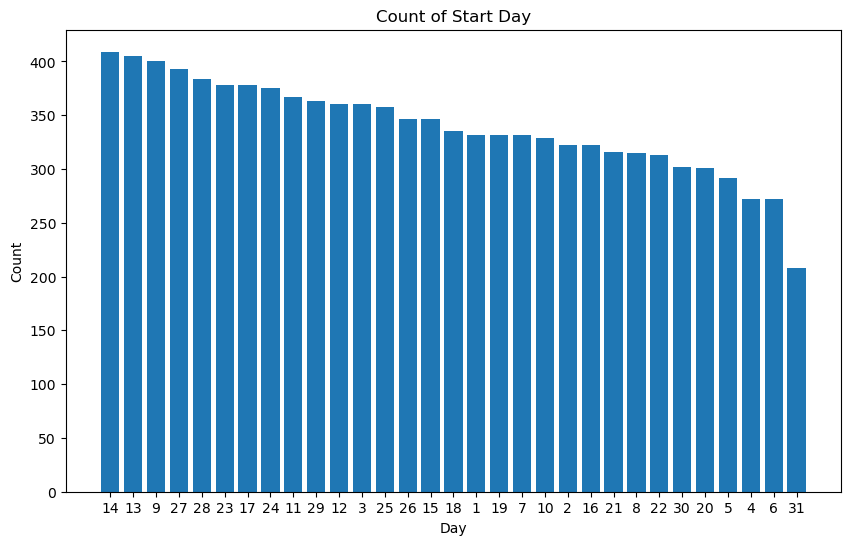

In [215]:
bar = df["Start_Day"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(height=bar.values,x=bar.index)
plt.title("Count of Start Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

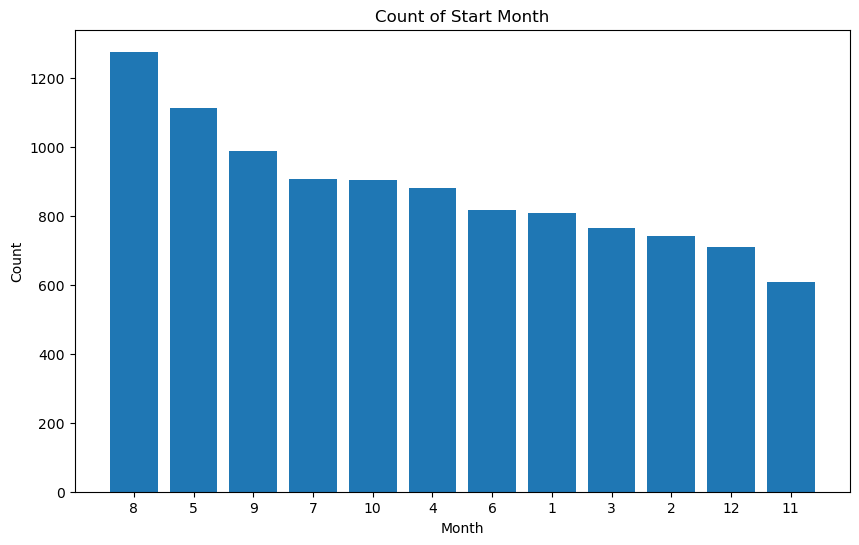

In [216]:
bar = df["Start_Month"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(height=bar.values,x=bar.index)
plt.title("Count of Start Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

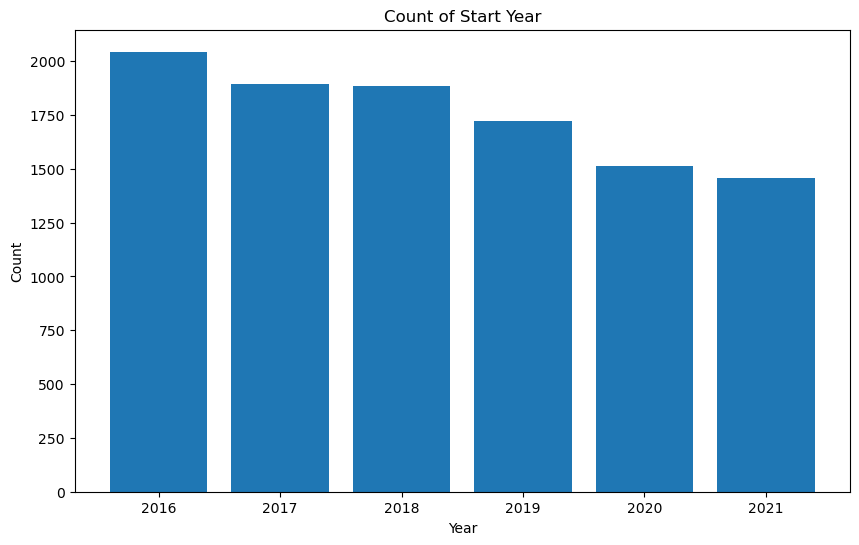

In [217]:
bar = df["Start_Year"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(height=bar.values,x=bar.index)
plt.title("Count of Start Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

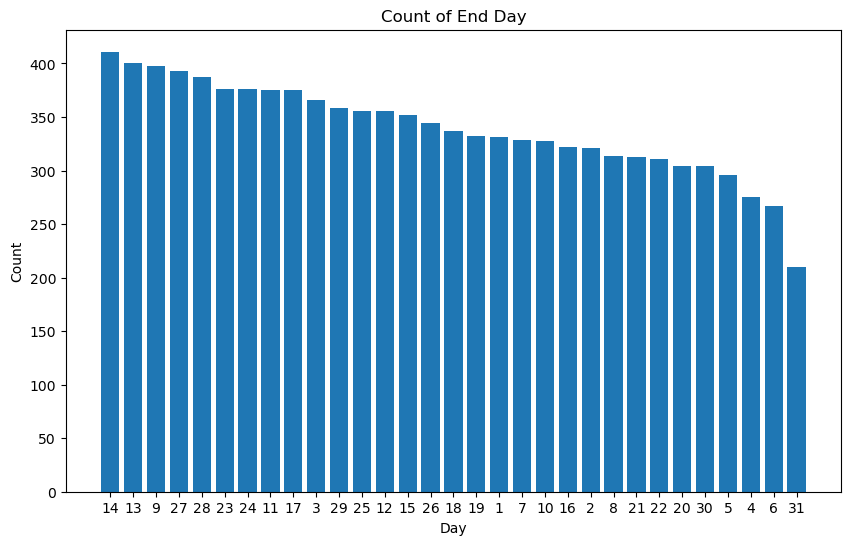

In [218]:
bar = df["End_Day"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(height=bar.values,x=bar.index)
plt.title("Count of End Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

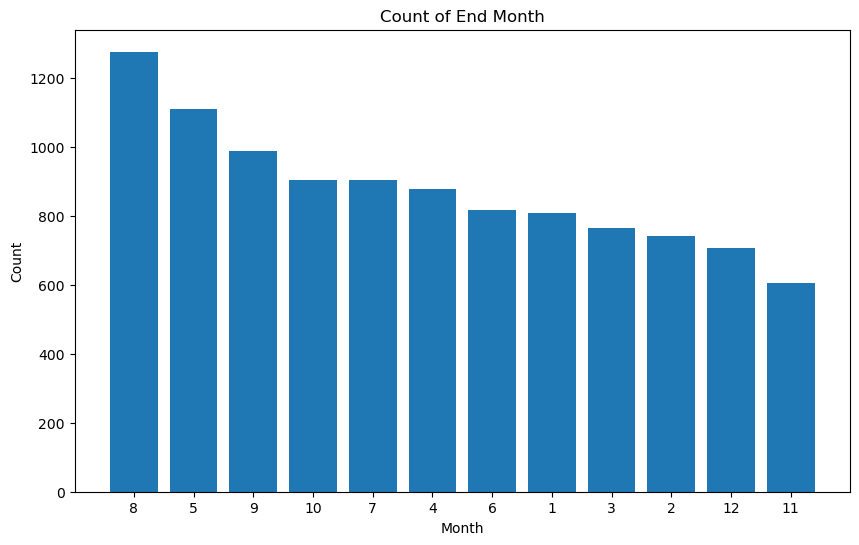

In [219]:
bar = df["End_Month"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(height=bar.values,x=bar.index)
plt.title("Count of End Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

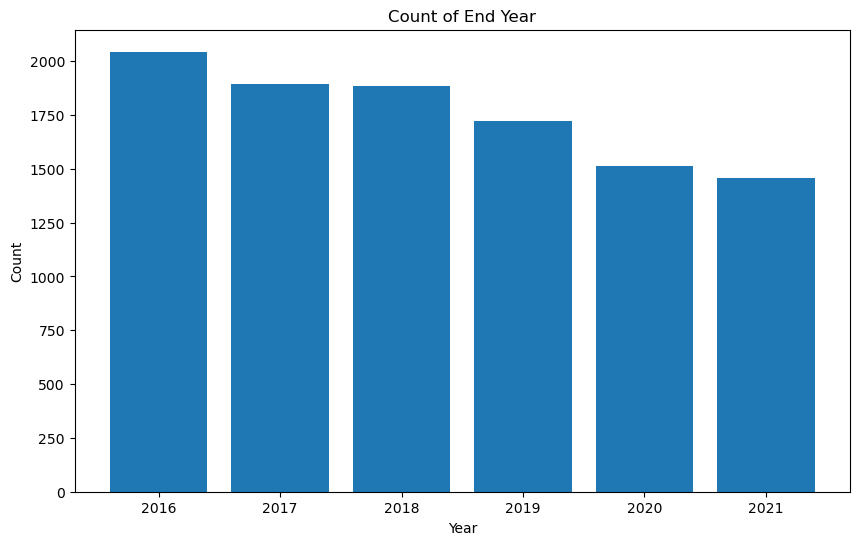

In [220]:
bar = df["End_Year"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(height=bar.values,x=bar.index)
plt.title("Count of End Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

    Part C

In [221]:
coded = pd.get_dummies(df, columns = ["Type","Severity","TimeZone","AirportCode","City","County","State"])

sc = StandardScaler()
data = coded.drop(labels=["StartTime(UTC)","EndTime(UTC)","Precipitation(in)"],axis=1)

sc.fit(data)
data_scaled = sc.transform(data)

pca = PCA(n_components=3)
pca.fit(data_scaled)

scaled_pca = pca.transform(data_scaled)

X_df = pd.DataFrame(data=scaled_pca,columns=["X1","X2","X3"])
X_df["Y"] = df["Precipitation(in)"].to_list()

    Part D

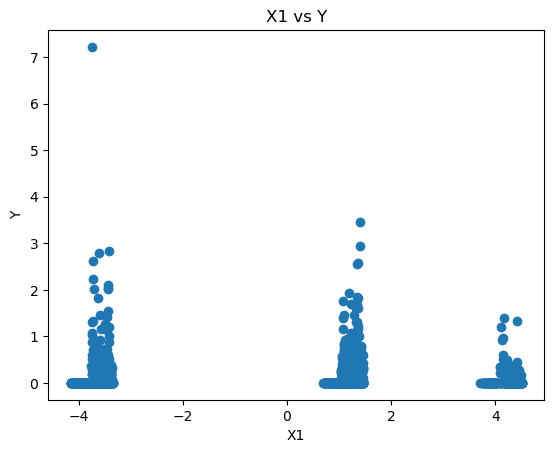

In [222]:
plt.scatter(X_df["X1"], X_df["Y"])
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("X1 vs Y")
plt.show()

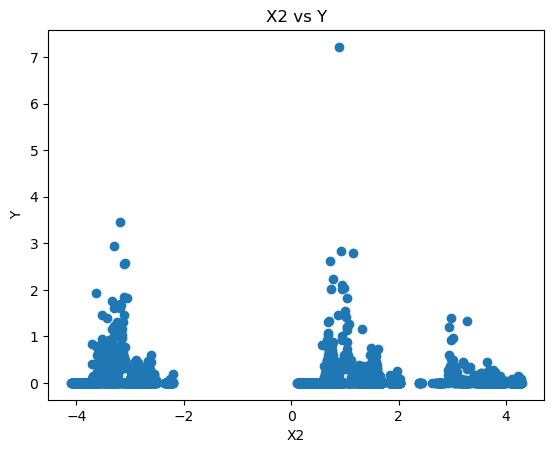

In [223]:
plt.scatter(X_df["X2"], X_df["Y"])
plt.xlabel("X2")
plt.ylabel("Y")
plt.title("X2 vs Y")
plt.show()

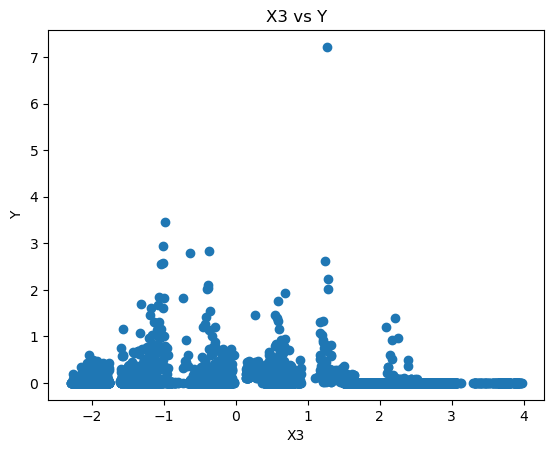

In [224]:
plt.scatter(X_df["X3"], X_df["Y"])
plt.xlabel("X3")
plt.ylabel("Y")
plt.title("X3 vs Y")
plt.show()